## Extract Data

This is a toy example with time series and Hupyter Notebooks, thus the prediction is not meant to be accurate by any measure. Expect a very introductory presentation, as this is my first foray into forecasting time series.

For the data to be analysed, I chose the time series of the currency pair of EURGBP, not so high quality dataset, but it may be a fun learning experience.
Here we go!

### Import necessary modules

In [38]:
from collections import OrderedDict
import datetime
import warnings
import quandl

# Plotting
import matplotlib.pyplot as plt
# Numerical computation
import pandas as pd
import numpy as np
import seaborn as sns
# Predicting 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline
warnings.filterwarnings('ignore')
#pd.options.display.mpl_style = 'default'

Fetching ForEx data from Quandl using Pandas

In [18]:
data = quandl.get("ECB/EURGBP",returns="pandas") 	# pandas data series

In [65]:
data.head()
#print(data)

,Value
Date,
1999-01-04,0.71110
1999-01-05,0.71220
1999-01-06,0.70760
1999-01-07,0.70585
1999-01-08,0.70940


## Plot data  

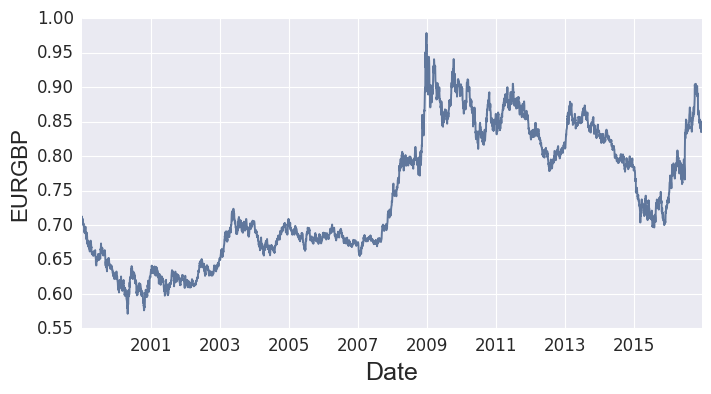

In [83]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.figure()
fig.patch.set_facecolor('white')     # Set the outer colour to white
    
# Plot the EURGBP time-series 
plt.plot(data[['Value']])
plt.xlabel('Date', fontsize=18)
plt.ylabel('EURGBP', fontsize=16)  
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
# Plot the figure
plt.show()

#### Differencing
Differencing is a simple process that extracts the relative difference between any two number of adjacent instances, and for this case the number will be 2. Be aware that this means that the first instance will be invalid as there is no previous instance to subtract.

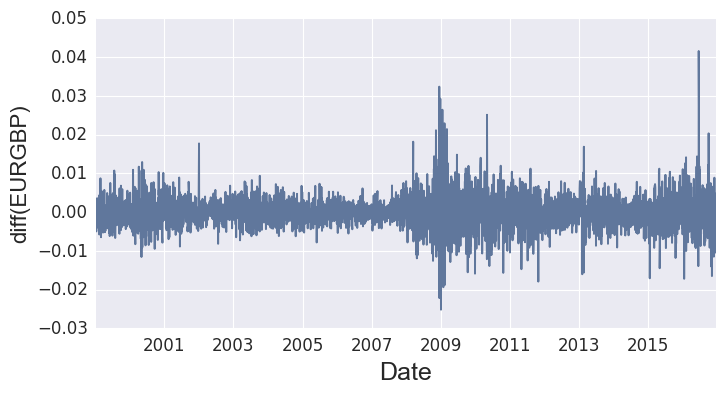

In [114]:
data_diff = data - data.shift()
data.dropna(inplace=True)
#print(data) #Print original values
plt.plot(data_diff) 
# Plot the differences
plt.xlabel('Date', fontsize=18)
plt.ylabel('diff(EURGBP)', fontsize=16)  
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.show()

# remove NaN values!
data_diff.dropna(inplace=True)

## Training a Predictor
The time series above does not show a trend anymore and seems quite stationary (visually, at least). The next step is to use Auto-Regressive Integrated Moving Averages (ARIMA) to forecast the time series.
### Auto-Regressive Terms
Lag: In time series analysis, "lag" is a way to refer to previous values of a variable. For example, you may predict a new value based on p past values (lags).
Auto-Regressive terms (ARIMA) are just the number of lags used for predicting a new value. So if there are 5 auto-regressive terms, then the new value is dependent on 5 past terms.
### Moving Average Terms
Moving average refers to a technique to calculate the trend of the data. It chooses a time window and averages the values inside that time window to smooth out the noise. For a visual interpretation, check the graph below.
Moving Average terms (ARIMA) are lagged errors used for predicting a new value. So if there are 5 moving average terms, each term is also predicted by 5 errors calculated as the difference between the moving average value at that instance and the actual value.
### How to calculate the terms?
To decide on what values the terms should take, one may use techniques such as Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF), but there is very little data in this example, so I will simply pick both to be 1.

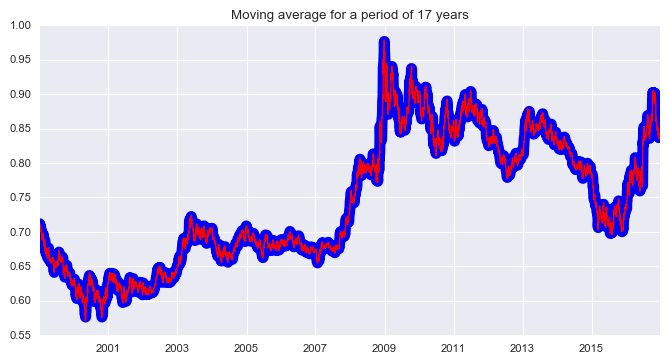

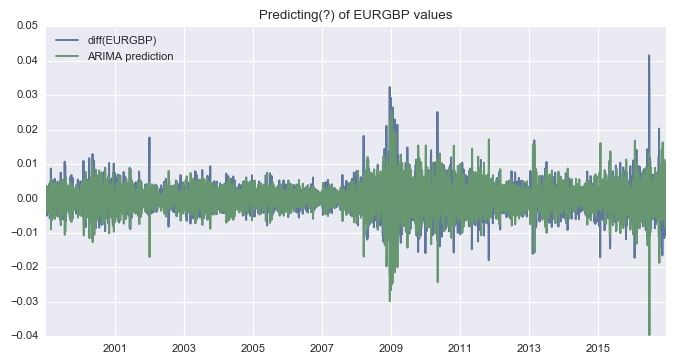

In [128]:
moving_avg = pd.rolling_mean(data,2)
plt.plot(moving_avg, color='b',  linewidth=8.0)
plt.plot(data, color='r',  linewidth=1.0)
plt.title('Moving average for a period of 17 years')
plt.show()

# Helper (Elf) function
def plot_graphs(series1, series2, label1="diff(EURGBP)", label2="ARIMA prediction", title="Predicting(?) of EURGBP values"):
    plt.plot(series1, label=label1)
    plt.plot(series2, label=label2)
    plt.legend(loc='best')
    plt.title(title)
    plt.show()
    
model = ARIMA(data_diff, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)  
plot_graphs(data_diff, results_ARIMA.fittedvalues)

### Visualising the results

Above, it can be seen that although the ARIMA predictions catch some of the peaks, it overestimates quite a bit at times -- for instance, the actual results are rarely ever negative.
Keep in mind that at this point, the plot only displays the difference between each instance. 
To visualise the actual results, one needs to scale back the results:

Value    0.7111
Name: 1999-01-04 00:00:00, dtype: float64


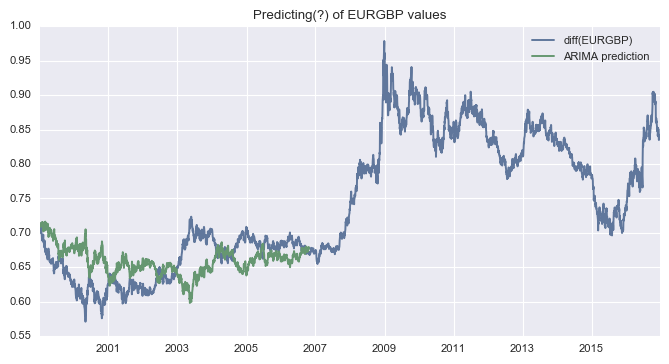

In [165]:
preds = results_ARIMA.predict(end=2000).cumsum() +  0.7111

print(data.ix[0])

plot_graphs(data,preds)

### Discussion
I suppose that this is far from enough and high quality data to get good results, but the results may also be bad because it predicted negative differences previously, thus the values have a harder time picking up. To confirm this, I will plot the unscaled predictions:

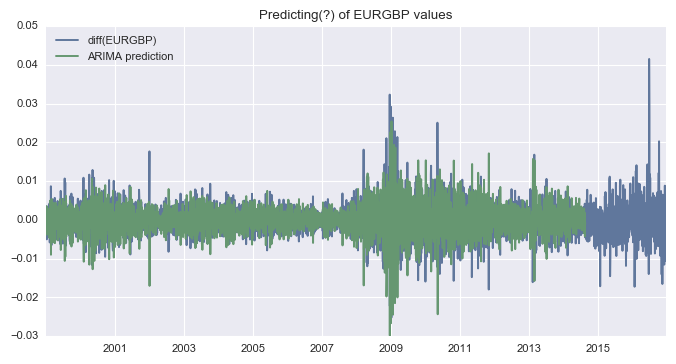

In [163]:
plot_graphs(data_diff, results_ARIMA.predict(end=4000))

#### Improving results
To improve the results I will try running ARIMA with different parameters, and predict on the non-stationary series.
No AR terms, 2 MA terms.
With these settings, we get much worse results!!!

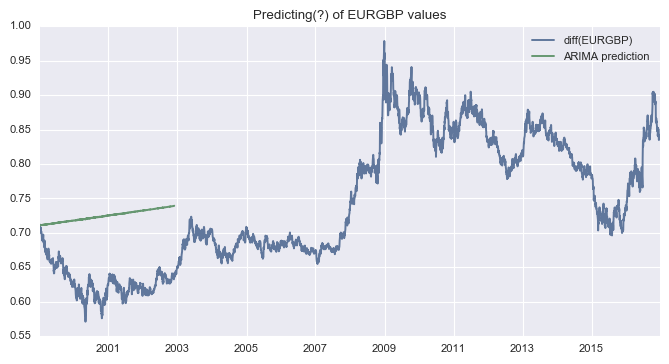

In [171]:
results_ARIMA = ARIMA(data_diff, order=(0, 0, 2)).fit(disp=-1)
preds = results_ARIMA.predict(end=1000).cumsum() + 0.7111
plot_graphs(data,preds)

#### Predicting on non-stationary series:

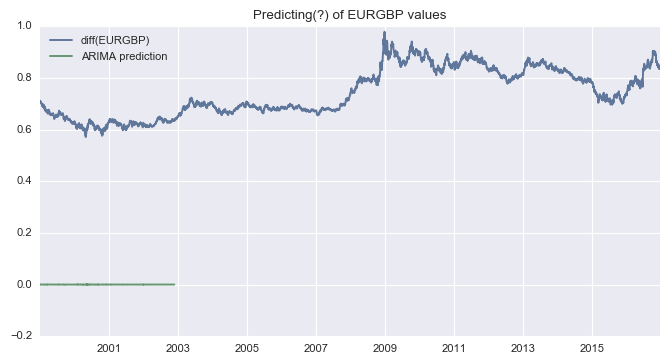

In [173]:
results_ARIMA = ARIMA(data, order=(1, 1, 0)).fit(disp=-1)
preds = results_ARIMA.predict(end=1000)
plot_graphs(data,preds)

### Take home message
To obtain better results, I believe there's a need for more training data, and a better understanding of the domain -- in this case, better understanding of how ARIMA works and how to tune the parameters would probably help.
The experiment however was successful in the sense that it provided us with an interesting hands-on introduction to time series and using Jupyter Notebooks as a presentation medium.